Yo yo this my file >:)

In [1]:
# imports 
import functions as fn 
import numpy as np
import pandas as pd 
import itertools
import matplotlib.pyplot as plt

1 table -> overall
1 table -> variable specific

overall: 

- nb records
- nb features
- nb 

put distribution type in table??

important things: 

- descriptive table -> add: distribution type? correlation coefficient to Mood var?
- data distribution -> histograms/boxplots
- data patterns -> datetime plot
- data relationships -> correlation matrix?

Comments: 

- very larege number of unique time entries -> problematic for models
- big chunks of missing data for certain variables -> not 'Na' but just not recorded 
- ... 



In [2]:
df = fn.load_data()
df = fn.widen_data(df)
df

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df['sms'].nunique())

1


var table: 

- type of data 
- range of values
- nb of unique values 
- descriptive stats (mean, sd)
- number of incorrect values
- number of missing values 


In [4]:
# datatypes
types = ['id', 'datetime', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric','numeric', 'numeric','numeric','numeric','numeric', 'categorical', 'numeric', 'numeric', 'ordinal', 'numeric', 'categorical']

# range of values **
val_range = []
for var in df:
    if var != 'id':
        r = (df[var].min(), df[var].max())
        if var != 'time':
            r = (round(r[0], 2), round(r[1], 2))
        val_range.append(r)
val_range.insert(0, 'Na')

# nb of unique values ** 
n_unique = [df[var].nunique() for var in df]

# mean + std
mean_std = []
for var in df: 
    if var != 'id' and var != 'time':
        mean = round(df[var].mean(), 2)
        std = round(df[var].std(), 2) 
        res = f'{mean} ({std})'
        mean_std.append(res)
mean_std.insert(0,'Na')
mean_std.insert(0,'Na')



df1 = pd.DataFrame({'Variables': df.columns, 
                    'Data types': types, 
                    'unique values': n_unique, 
                    'Value range': val_range, 
                    'mean (std)': mean_std,
                    })
df1


,Variables,Data types,unique values,Value range,mean (std)
0,id,id,27,Na,Na
1,time,datetime,336907,"(2014-02-17 07:00:52.197000, 2014-06-09 00:00:00)",Na
2,activity,numeric,1868,"(0.0, 1.0)",0.12 (0.19)
3,appCat.builtin,numeric,23237,"(-82798.87, 33960.25)",18.54 (415.99)
4,appCat.communication,numeric,39890,"(0.01, 9830.78)",43.34 (128.91)
5,appCat.entertainment,numeric,12575,"(-0.01, 32148.68)",37.58 (262.96)
6,appCat.finance,numeric,729,"(0.13, 355.51)",21.76 (39.22)
7,appCat.game,numeric,792,"(1.0, 5491.79)",128.39 (327.15)
8,appCat.office,numeric,3178,"(0.0, 32708.82)",22.58 (449.6)
9,appCat.other,numeric,5014,"(0.01, 3892.04)",25.81 (112.78)


In [5]:
df = fn.load_data()
df = fn.widen_data(df)
df = fn.group_data(df).reset_index()
df

variable,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,screen,circumplex.arousal,circumplex.valence,activity,mood
0,2014-02-17,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,NaN,NaN,NaN,NaN
1,2014-02-18,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,NaN,NaN,NaN,NaN
2,2014-02-19,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,NaN,NaN,NaN,NaN
3,2014-02-20,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,NaN,NaN,NaN,NaN
4,2014-02-21,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2014-06-05,1749.277,958.821,0.0,0.0,0.0,0.0,47.360,171.964,225.737,0.0,0.000,0.0,2371.588999,0.0,1.0,0.152343,7.0
109,2014-06-06,945.898,1710.924,0.0,0.0,0.0,0.0,36.414,0.000,0.000,0.0,2.072,0.0,2733.332000,0.5,1.0,0.189476,7.5
110,2014-06-07,5027.498,735.965,0.0,0.0,0.0,0.0,6.214,106.850,0.000,0.0,0.000,0.0,5530.377999,-1.0,NaN,0.081893,8.0
111,2014-06-08,351.389,375.515,0.0,0.0,0.0,0.0,18.069,190.760,0.000,0.0,0.000,0.0,1131.197999,-1.5,1.0,0.079510,6.5


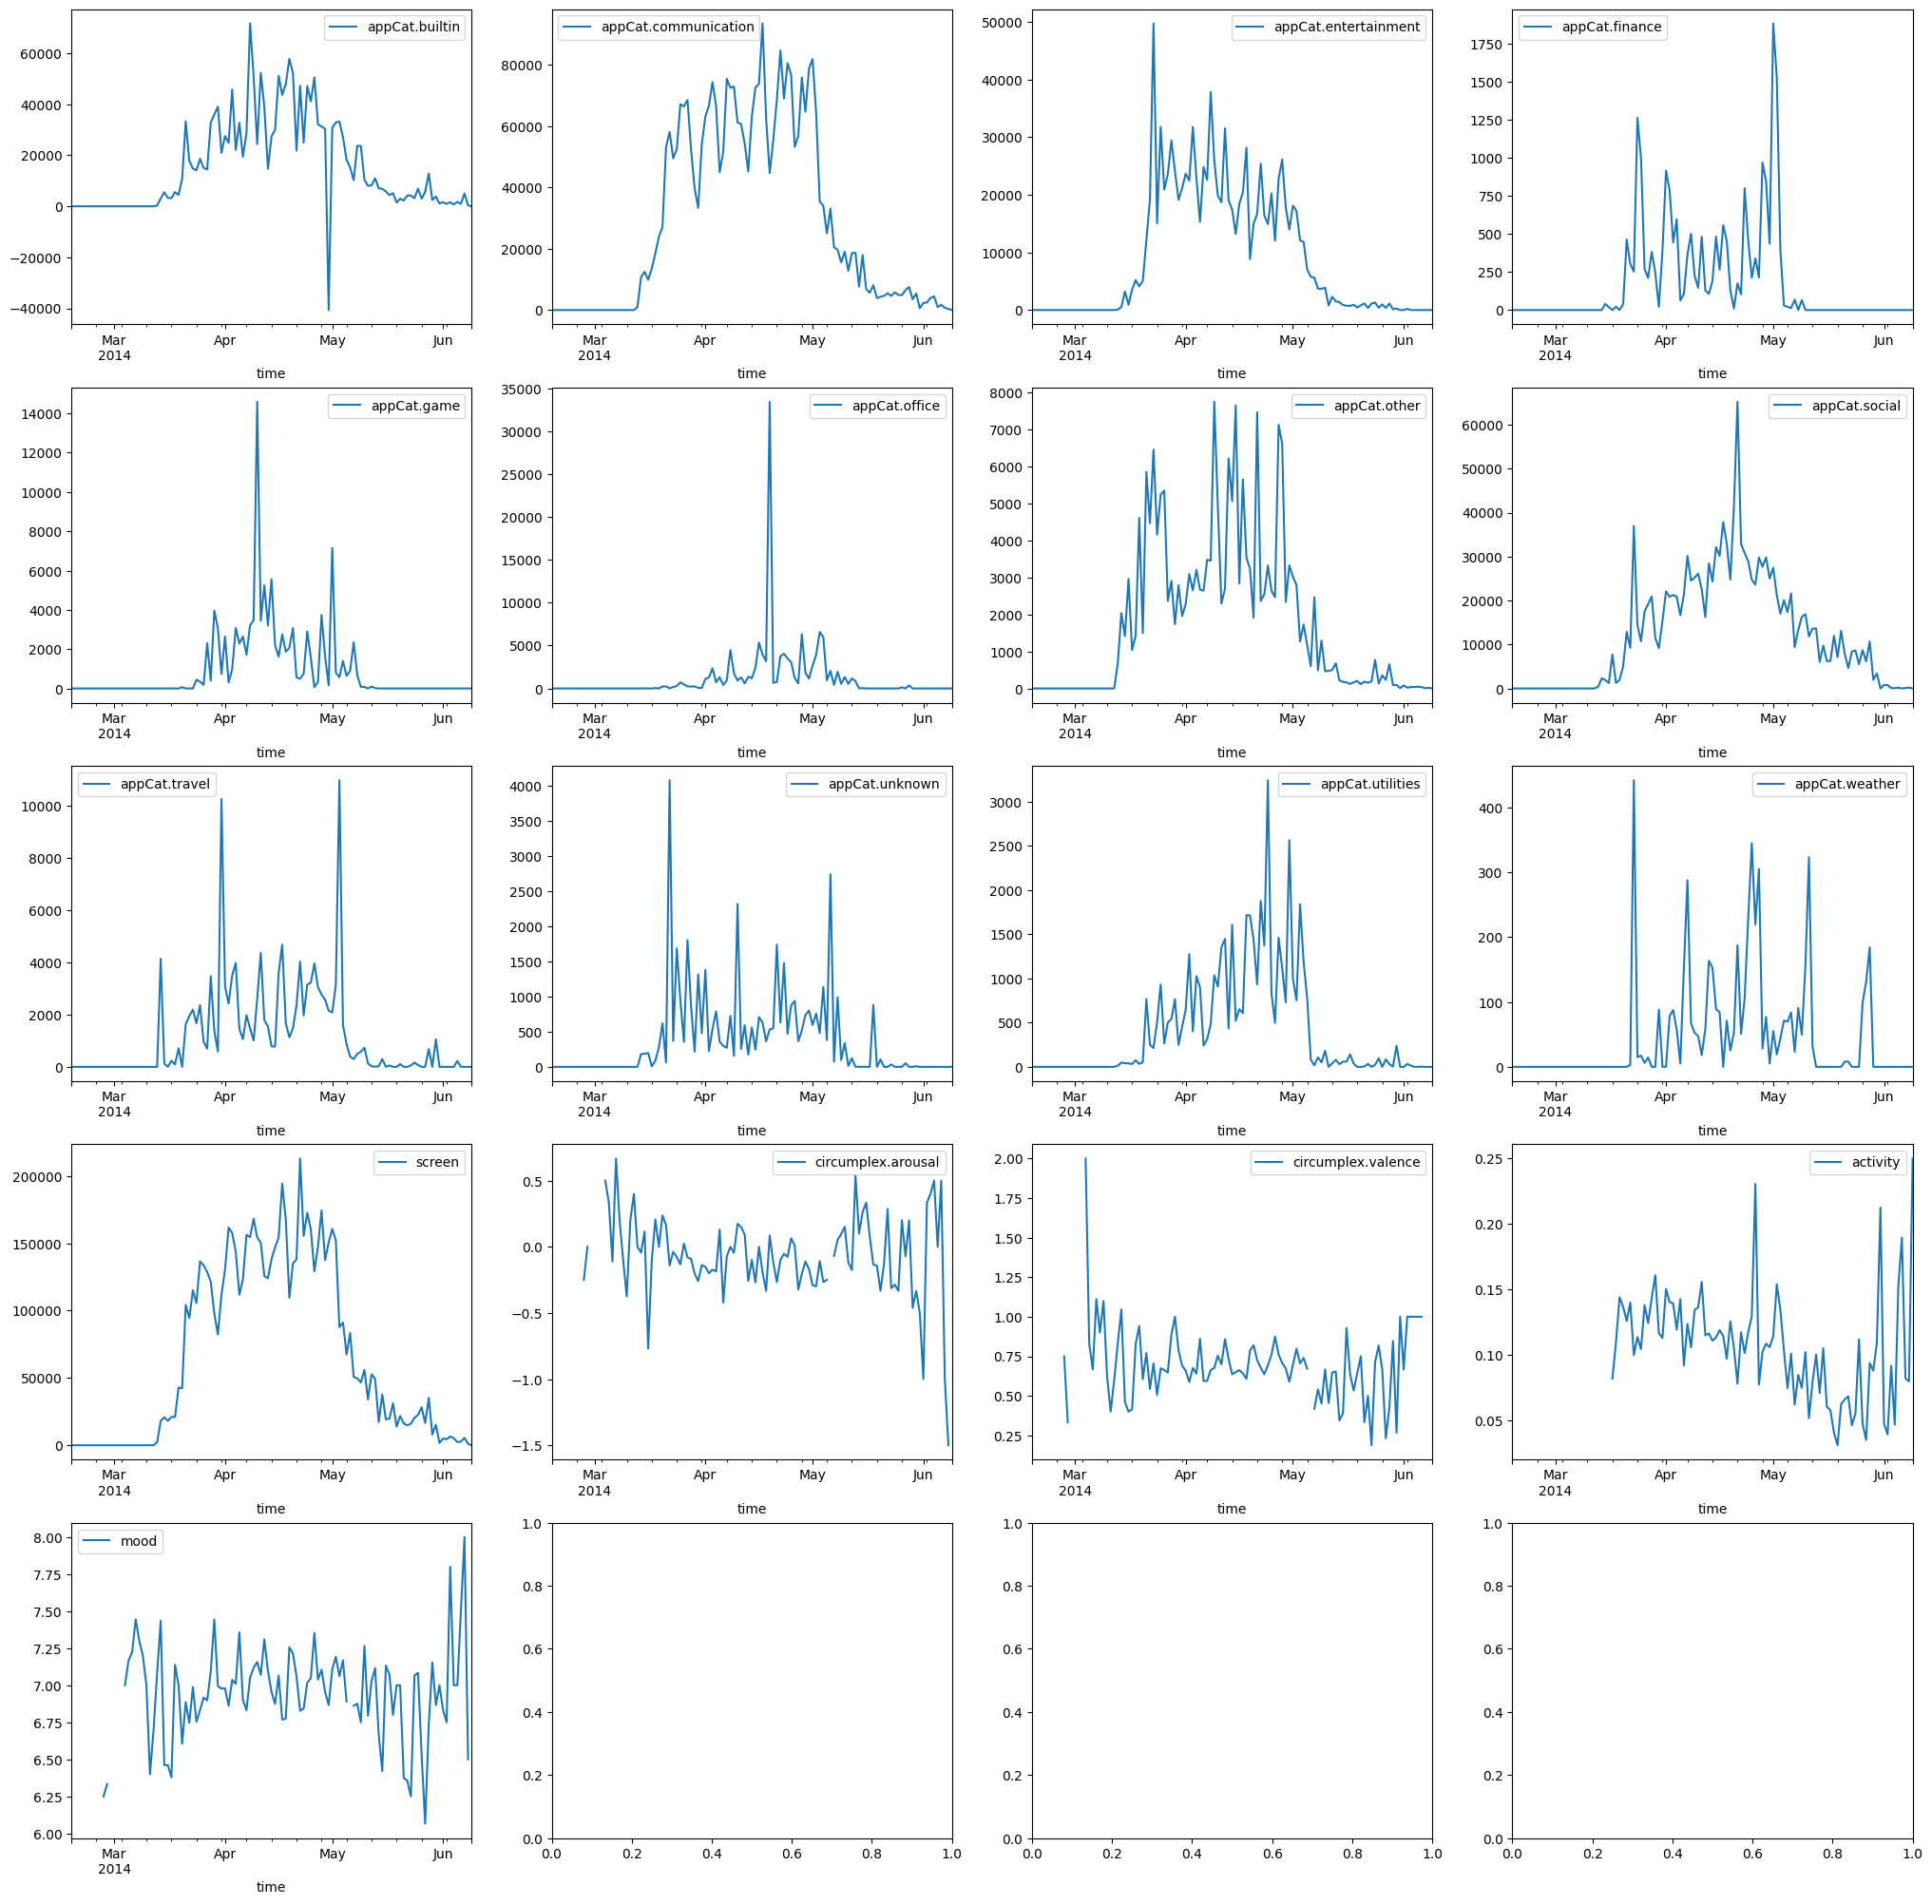

In [10]:
# time plots 
# sms and stuff is missing 

p_id = list(itertools.product(list(range(0,5)), list(range(0,4))))
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(25,25))

for i, col in enumerate(df.columns[1:]):
    df.plot(x='time', y=col, kind='line', ax=axs[p_id[i][0],p_id[i][1]])
    # # Set plot title and labels
    # axs[0,1].set_title('Line Plot of {}'.format(col))
    # axs[0,1].set_xlabel('datetime')
    # axs[0,1].set_ylabel(col)
plt.show()



conclusions: 
- get rid of time frame before march or sth -> too much missing data in all vars
- 

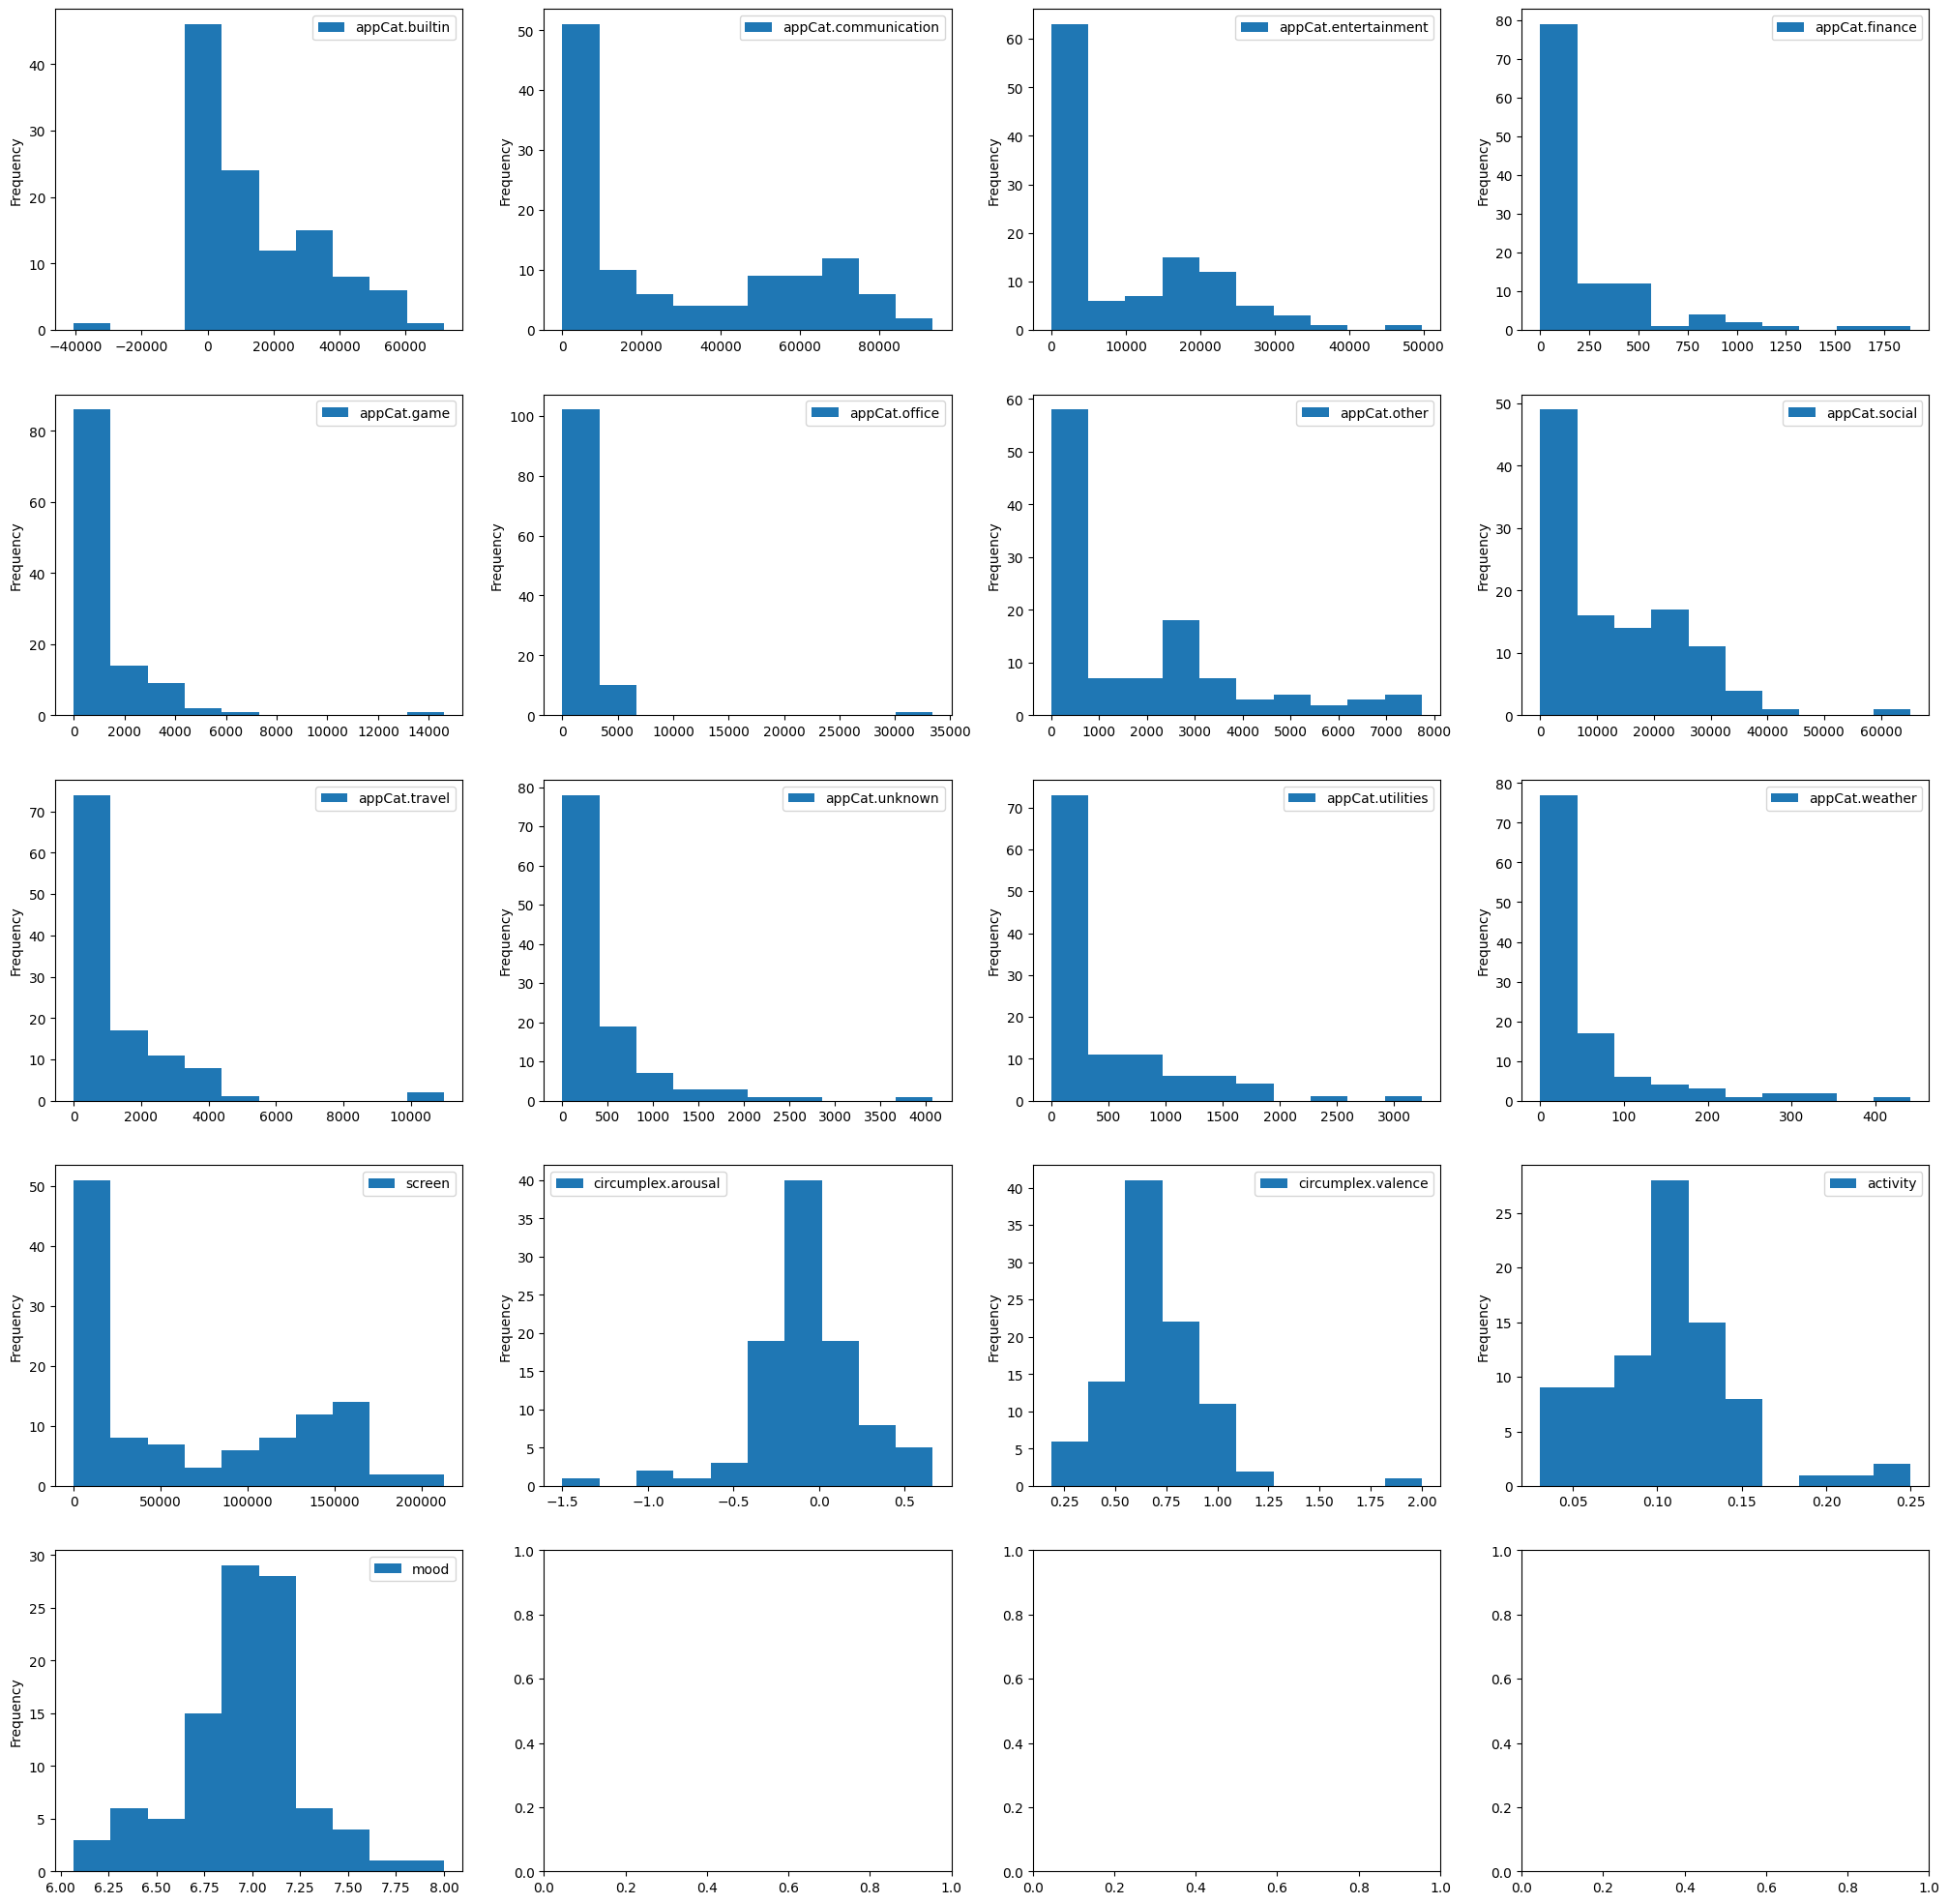

In [9]:
# distribution plots 

p_id = list(itertools.product(list(range(0,5)), list(range(0,4))))
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(25,25))

for i, col in enumerate(df.columns[1:]):

    df.plot(x='time', y=col, kind='hist', ax=axs[p_id[i][0],p_id[i][1]])
    # # Set plot title and labels
    # axs[0,1].set_title('Line Plot of {}'.format(col))
    # axs[0,1].set_xlabel('datetime')
    # axs[0,1].set_ylabel(col)
plt.show()

In [8]:
# variable specific table 